# 

- **Project Number** : NO. 03
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 610301060

The goal is to classify Brain image into Tumor and No-Tumor.

[Dataset](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection)

## Importing Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Loading Data

In [3]:
train_set = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/DataSet',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/DataSet',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
)

Found 2070 files belonging to 2 classes.
Using 1656 files for training.
Found 2070 files belonging to 2 classes.
Using 414 files for validation.


Show two samples of dataset:

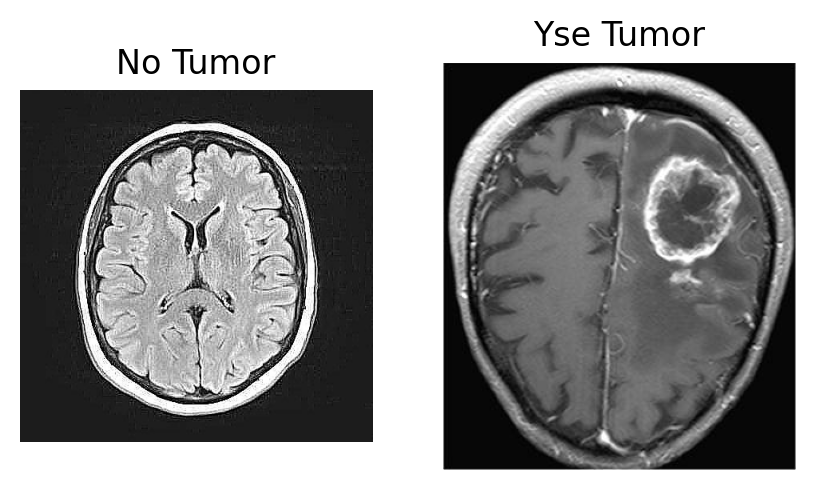

In [ ]:
no_tumor_img = cv2.imread('/gdrive/MyDrive/no212.jpg')
yes_tumor_img = cv2.imread('/gdrive/MyDrive/y74.jpg')

plt.figure(figsize=(5, 5), dpi=200)
plt.subplot(1, 2, 1)
plt.title('No Tumor')
plt.imshow(no_tumor_img[:,:,::-1])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('Yse Tumor')
plt.imshow(yes_tumor_img[:,:,::-1])
plt.axis("off")

plt.show()

## Model

In [11]:
myModel = Sequential()
myModel.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (512, 512, 1)))
myModel.add(Conv2D(32, (3, 3), activation = 'relu'))
myModel.add(MaxPool2D(2, 2))
myModel.add(Dropout(0.3))

myModel.add(Conv2D(64, (3, 3), activation = 'relu'))
myModel.add(Conv2D(64, (3, 3), activation = 'relu'))
myModel.add(Dropout(0.3))
myModel.add(MaxPool2D(2, 2))
myModel.add(Dropout(0.3))

myModel.add(Flatten())

myModel.add(Dense(40, activation = 'relu'))
myModel.add(Dense(10, activation = 'relu'))
myModel.add(Dropout(0.3))

myModel.add(Dense(2, activation = 'softmax'))

myModel.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [12]:
hist = myModel.fit(train_set, epochs = 20, validation_data = validation_set)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


52/52 [==============================] - 282s 5s/step - loss: 78.6190 - accuracy: 0.7385 - val_loss: 0.3658 - val_accuracy: 0.8575
Epoch 2/20
52/52 [==============================] - 44s 838ms/step - loss: 0.3736 - accuracy: 0.8514 - val_loss: 0.3119 - val_accuracy: 0.9251
Epoch 3/20
52/52 [==============================] - 44s 832ms/step - loss: 0.2396 - accuracy: 0.8992 - val_loss: 0.2791 - val_accuracy: 0.9396
Epoch 4/20
52/52 [==============================] - 44s 837ms/step - loss: 0.1820 - accuracy: 0.9330 - val_loss: 0.1845 - val_accuracy: 0.9565
Epoch 5/20
52/52 [==============================] - 44s 832ms/step - loss: 0.1891 - accuracy: 0.9191 - val_loss: 0.1952 - val_accuracy: 0.9444
Epoch 6/20
52/52 [==============================] - 44s 829ms/step - loss: 0.1287 - accuracy: 0.9481 - val_loss: 0.1683 - val_accuracy: 0.9420
Epoch 7/20
52/52 [==============================] - 44s 831ms/step - loss: 0.0596 - accuracy: 0.9807 - val_loss: 0.1962 - val_accuracy: 0.9517
Epoch 8/20


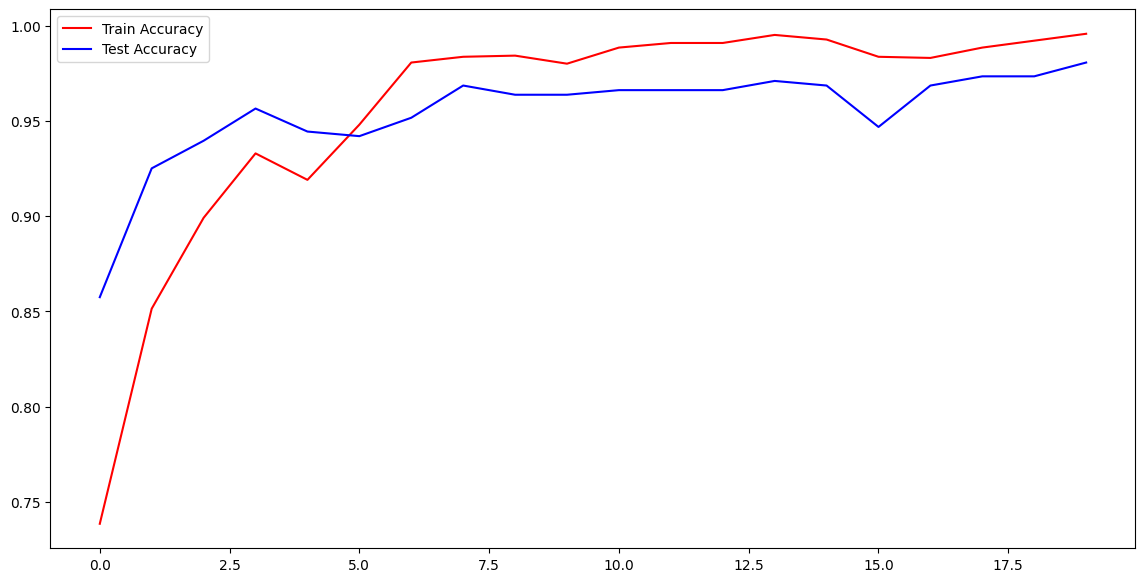

In [13]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(len(acc))
plt.figure(figsize = (14, 7))
plt.plot(epochs, acc, 'r', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Test Accuracy')
plt.legend(loc = 'upper left')
plt.show()

## Model Evaluation

In [14]:
myModel.evaluate(validation_set)

13/13 [==============================] - 2s 120ms/step - loss: 0.1879 - accuracy: 0.9807


[0.1879246085882187, 0.9806763529777527]

In [15]:
validation_set = list(validation_set)
test_label = np.concatenate([y for x, y in validation_set])
y_pred = myModel.predict(np.concatenate([x for x, y in validation_set]))
y_pred = y_pred.argmax(axis = 1)


13/13 [==============================] - 2s 120ms/step


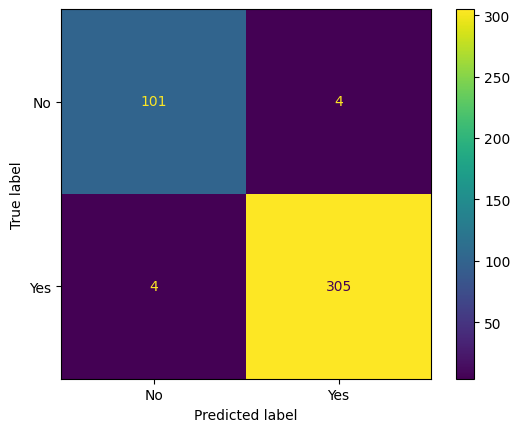

In [16]:
ConfusionMatrixDisplay(confusion_matrix(test_label, y_pred), display_labels = ['No', 'Yes'], ).plot()
plt.show()

In [17]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.99      0.99      0.99       309

    accuracy                           0.98       414
   macro avg       0.97      0.97      0.97       414
weighted avg       0.98      0.98      0.98       414

